In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1.0/255)

2022-09-16 15:15:40.040226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = train_datagen.flow_from_directory('../Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', target_size=(128,128), batch_size=16, class_mode='categorical')
x_test  = test_datagen.flow_from_directory('../Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set', target_size=(128,128), batch_size=16, class_mode='categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [14]:
model = Sequential()

In [15]:

model.add(Convolution2D(32, (3,3), input_shape=(128,128,3), activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(300, kernel_initializer='uniform', activation='relu'))
model.add(Dense(150, kernel_initializer='uniform', activation='relu'))
model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
model.add(Dense(9, activation='softmax', kernel_initializer='uniform'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit_generator(x_train, steps_per_epoch=100, epochs=40, validation_data=x_test)

Epoch 1/40


/var/folders/yh/v47pylt911j8mxf51p18rlndt3chyv/T/ipykernel_5566/3684251702.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(x_train, steps_per_epoch=100, epochs=40, validation_data=x_test)


100/100 [==============================] - 64s 639ms/step - loss: 2.0344 - accuracy: 0.2394 - val_loss: 1.8155 - val_accuracy: 0.3604
Epoch 2/40
100/100 [==============================] - 62s 615ms/step - loss: 1.6468 - accuracy: 0.4050 - val_loss: 1.4358 - val_accuracy: 0.4985
Epoch 3/40
100/100 [==============================] - 62s 622ms/step - loss: 1.4079 - accuracy: 0.4850 - val_loss: 1.5132 - val_accuracy: 0.4634
Epoch 4/40
100/100 [==============================] - 63s 633ms/step - loss: 1.2545 - accuracy: 0.5600 - val_loss: 1.1319 - val_accuracy: 0.5767
Epoch 5/40
100/100 [==============================] - 63s 630ms/step - loss: 1.1173 - accuracy: 0.5950 - val_loss: 1.3631 - val_accuracy: 0.4886
Epoch 6/40
100/100 [==============================] - 50s 499ms/step - loss: 0.9957 - accuracy: 0.6381 - val_loss: 0.8870 - val_accuracy: 0.6733
Epoch 7/40
100/100 [==============================] - 64s 645ms/step - loss: 0.9352 - accuracy: 0.6637 - val_loss: 1.1974 - val_accuracy: 0.5

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 300)               38102700  
                                                                 
 dense_5 (Dense)             (None, 150)               45150     
                                                                 
 dense_6 (Dense)             (None, 75)                11325     
                                                      

In [24]:
model.save('../flask/vegetable1.h5')

In [23]:
model.evaluate_generator(x_test)

/var/folders/yh/v47pylt911j8mxf51p18rlndt3chyv/T/ipykernel_5566/890644720.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(x_test)


[0.5112420916557312, 0.824063241481781]

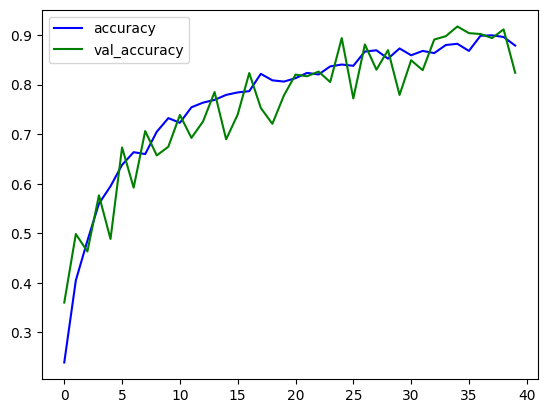

In [33]:

import matplotlib.pyplot as plt 

a=range(40)

plt.plot(a,history.history['accuracy'],c='blue',label='accuracy')
plt.legend()
plt.plot(a,history.history['val_accuracy'],c='green',label='val_accuracy')
plt.legend()


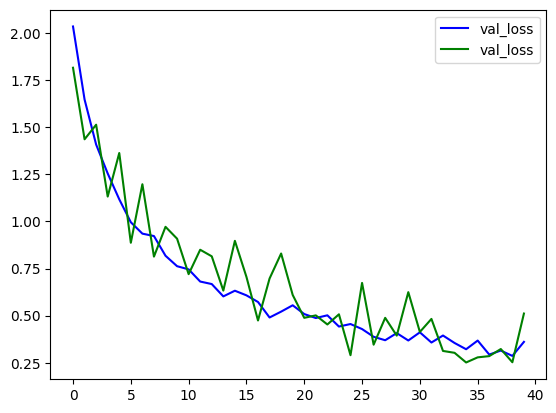

In [34]:
plt.plot(a,history.history['loss'],c='blue',label='val_loss')
plt.legend()
plt.plot(a,history.history['val_loss'],c='green',label='val_loss')
plt.legend()

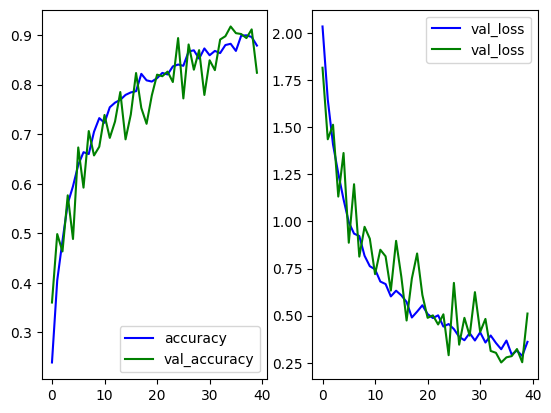

In [46]:
plt.subplot(1,2,1)
plt.plot(a,history.history['accuracy'],c='blue',label='accuracy')
plt.legend()
plt.plot(a,history.history['val_accuracy'],c='green',label='val_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(a,history.history['loss'],c='blue',label='val_loss')
plt.legend()
plt.plot(a,history.history['val_loss'],c='green',label='val_loss')
plt.legend()

In [47]:
from tensorflow.keras.models import load_model

model_temp = load_model('../flask/vegetable.h5')
model_temp.evaluate(x_test)

214/214 [==============================] - 13s 59ms/step - loss: 0.5077 - accuracy: 0.8112


[0.5076732635498047, 0.8111826777458191]

In [48]:
model.evaluate(x_test)

214/214 [==============================] - 12s 55ms/step - loss: 0.5112 - accuracy: 0.8241


[0.5112422108650208, 0.824063241481781]

In [50]:
model.save('../flask/vegetable.h5')